#  OpenCVの利用と画像データの前処理

- **[3.1 画像データの基礎](#3.1-画像データの基礎)**
    - **[3.1.1 RGBデータ](#3.1.1-RGBデータ)**
    - **[3.1.2 画像データのフォーマット](#3.1.2-画像データのフォーマット)**
    - **[3.1.3 透過データ](#3.1.3-透過データ)**
<br><br>
- **[3.2 OpenCVの基礎](#3.2-OpenCVの基礎)**
    - **[3.2.1 画像の読み込み・表示](#3.2.1-画像の読み込み・表示)**
    - **[3.2.2 画像の作成・保存](#3.2.2-画像の作成・保存)**
    - **[3.2.3 トリミングとリサイズ](#3.2.3-トリミングとリサイズ)**
    - **[3.2.4 回転・反転](#3.2.4-回転・反転)**
    - **[3.2.5 色調変換・色反転](#3.2.5-色調変換・色反転)**
<br><br>
- **[3.3 OpenCVの利用](#3.3-OpenCVの利用)**
    - **<a href = "#3.3.1-閾値処理(二値化)">3.3.1 閾値処理(二値化)</a>**
    - **[3.3.2 マスキング](#3.3.2-マスキング)**
    - **[3.3.3 ぼかし・モザイク](#3.3.3-ぼかし・モザイク)**
    - **[3.3.4 ノイズ除去](#3.3.4-ノイズ除去)**
    - **[3.3.5 膨張・収縮](#3.3.5-膨張・収縮)**
- **[3.5 添削問題](#3.5-添削問題)**

***

## <font color="Red"><重要>本講座を開始する前にこちらのコードを実行してください。</font>

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
%matplotlib inline
def aidemy_imshow(name, img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()


cv2.imshow = aidemy_imshow


## 3.1 画像データの基礎

### 3.1.1 RGBデータ

実はコンピュータ上ではたった3色の組み合わせでおおよそ全ての色を表現できます。これを「光の三原色」と言い、赤（Red）緑（Green）青（Blue）の3色です。余談になりますが、プリンターはCMYK、つまりシアン、マゼンダ、イエロー、ブラックを混ぜて色を表現する事が多いです。パソコンのディスプレイは光の発光を利用して色を表現しますが、印刷物は光の吸収を利用して色を表現するためこのような違いがでるのです。<br>
<br>
さて、コンピュータは画像を点の集まりとして扱っています。この点は**ピクセル**と呼ばれ、例えば縦が100ピクセルで横が100ピクセルの画像は100 x 100 = 10,000個のピクセルの集まりと言う事になります。各ピクセルは色の情報を保存する必要があります。例えば、カラー画像であればRGBの3色がそれぞれどのくらいの明るさ(濃さ)であるかを持つ必要があり、多くの場合0から255の範囲で色の明るさを表現しています。数字が大きいほど明るくなり、例えば、ただの赤は(255, 0, 0)と表現できます。紫色は(255, 0, 255)となります。(0, 0, 0)は黒を、(255, 255, 255)は白を表します。<br>
<br>
カラー画像は各ピクセルに3色の全ての情報を保存しなければならないので非常にサイズが大きくなります。モノクロ画像は1色分の明るさ(0から255)のみを保存すれば良いのでカラー画像に比べてデータ量は3分の1ですみます。<br>
後に扱うOpenCVで、1つのピクセルを表すための色要素の数を **チャンネル数** と呼びます。例えばRGBの画像はチャンネル数が3、モノクロ画像はチャンネル数が1です

#### 問題

- RGBデータではある色の明るさについての情報が与えられます。どの色の情報が与えられるか答えてください。

1. 赤 
1. 緑
1. 青
1. 上記のすべて

#### ヒント

- RGBが何を意味しているのかを考えてみてください。

#### 解答

上記のすべて

***

### 3.1.2 画像データのフォーマット

画像にはいくつかの種類があります。代表的なものを以下に紹介します。

<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/152974608457650.png">

既に説明した通り、画像は点の集合であり、それぞれの点がRed, Green, Blueの色情報を持っているので、そのままでは非常にサイズが大きくなってしまいます。上の表の右端のBMPは無圧縮、つまり色の情報をそのまま保持します。そのため赤一色の画像（つまり緑と青の分の色情報は使っていない）であっても緑と青の色情報を保存する領域を確保するため、サイズが非常に大きくなります。
BMP以外は色情報を効率的に圧縮する工夫をしています。JPGは写真を扱う事が得意で元の写真を大きく圧縮できますが、圧縮後の写真を元の写真に戻せなくなってしまう特徴があります。（非可逆圧縮と言います）。それに対してPNGは写真の圧縮率はJPGに劣るものの、可逆圧縮であり、圧縮した画像を元のクオリティに完全に戻す事もできます。GIFは古いフォーマットなので色数や圧縮率では劣りますが、簡単なアニメーションを表現する事ができます。

#### 問題

- アニメーションの表現に適している画像フォーマットを選択してください。

1. PNG 
1. JPG
1. BMP
1. GIF

#### ヒント

- 表現できる色は少ないです。

#### 解答

GIF

***

### 3.1.3 透過データ

画像の背景を透明にすることを透過といいます。透過させる方法は、ソフトを使ったり、画像の作成段階で透過させたりといろいろあります。後に紹介するOpenCVでも可能ですが、今回は扱いません。<br>
非透過PNG
<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1529748720992822.png" alt="非透過">
<br>
<br>
透過PNG
<img src="https://aidemyexstorage.blob.core.windows.net/aidemycontents/1529750614672625.png" alt="透過">
<br>
透過処理は表示するプログラムがどのように色を扱うかにもよります。例えば、BMPは画像としては透過処理をサポートしていませんが、BMPで作られているアイコン画像は透過しているように見える時があります。これはアイコンを表示するプログラムが特定の位置の色を透過色として扱っているためです。画像として透過をサポートしているのはGIFとPNGです。

#### 問題

- 透過処理がサポートされていない画像フォーマットを選択してください。

1. JPG
1. GIF
1. PNG
1. 上記の全て

#### ヒント

- 比較的容量が小さいものです。

#### 解答

JPG

***

## 3.2 OpenCVの基礎

### 3.2.1 画像の読み込み・表示

OpenCVは、画像を扱うのに便利なライブラリです。まずは画像を読み込んで、出力してみます。
```python
# インポートです

import numpy as np
import cv2

# 画像を読み込みます

img = cv2.imread("cleansing_data/sample.jpg")

# sampleはウィンドウの名前です

cv2.imshow("sample", img)
```

#### 問題

- cleansing_dataフォルダ内の画像sample.jpgを出力してください。
- ウィンドウ名は"sample"としてください。

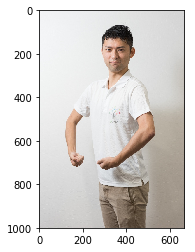

In [10]:
import numpy as np
import cv2

# ここに解答を書いてください
img = cv2.imread("cleansing_data/sample.jpg")
cv2.imshow("sample", img)

#### ヒント

- `cv2.imread("ファイル名")`で画像を読み込むことができます。
- `cv2.imshow("ウィンドウ名", 画像データ)`で画像の出力ができます。

#### 解答例

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# OpenCVを用いて画像を読み込んでください
img = cv2.imread("cleansing_data/sample.jpg")

# 画像を出力してください
cv2.imshow("sample", img)

***

### 3.2.2 画像の作成・保存

次は自分で画像を作ってみます。cv2で画像を処理するさいはRGBの順番ではなく、BGRの順番になることに注意しましょう。 <br>
画像は `[B, G, R]` の値を指定して作ります。今回は赤色の画像を作成します。 <br>
```python
import numpy as np
import cv2

# 画像のサイズを決めます。

img_size = (512, 512)

# 画像の情報を持つ行列を作ります
# 今回は赤い画像なので、各要素が[0, 0, 255]の512 * 512の行列を作ることを考えます
# 行列が転置されることに注意しましょう
# 画像データの各要素は、0~255の値しかとりません。このことを明示するためにdtypeオプションでデータの型を定めます。

my_img = v([[ [0, 0, 255] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")
print (my_img)
# 表示

cv2.imshow("sample", my_img)

# 保存
# ファイル名はmy_img.jpg

cv2.imwrite("my_red_img.jpg", my_img)
```

「`for _ in range`」の \_ は、for文で繰り返す際に、\_ にあたる変数をfor文の中で使わない場合に使用します。1つめのforで横に512枚の画像、2つめのforでさらに縦に512枚の画像を作成する多重ループになっています。

#### 問題

- サイズが512 $\times$ 512の緑色の画像を作り、表示してください。
- 画像の出力はcv2.imshow()を用いてください。

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


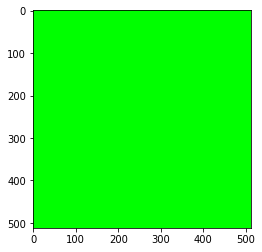

True

In [19]:
import numpy as np
import cv2

# 画像のサイズを決める

img_size = (512, 512)

# サイズが512 × 512の緑色の画像を作ってください
buffer = np.array([ [[0,255, 0] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype='uint8')
print(buffer)
cv2.imshow("sample", buffer)

cv2.imwrite("my_red_img.jpg", buffer)


#### ヒント

- 各要素が`[0, 255, 0]`の、512 $\times$ 512のnp.arrayを作ってください。

#### 解答例

In [5]:
import numpy as np
import cv2

# 画像のサイズを決める

img_size = (512, 512)

# サイズが512 × 512の緑色の画像を作ってください

img = np.array([[[0, 255, 0] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")

cv2.imshow("sample", img)

***

### 3.2.3 トリミングとリサイズ

続いて、画像をトリミングとリサイズをします。トリミングとは、画像の一部を取り出す操作のことです。リサイズとは、画像のサイズを変える(拡大、縮小)することです。

```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
size = img.shape

# 画像を表す行列の一部を取り出してくれば、それがトリミングとなります
# n等分したい時はサイズの商を取りますが、小数点切り下げをしましょう

my_img = img[: size[0] // 2, : size[1] // 3]

# 今回はもとの倍率を保ったまま幅と高さをそれぞれ2倍します。新たにサイズを指定する際、(幅、高さ)の順になることに注意してください

my_img = cv2.resize(my_img, (my_img.shape[1] * 2, my_img.shape[0] * 2))

cv2.imshow("sample", my_img)
```
***
リサイズの応用として、画像を縮小して画素数を落としてから元のサイズに戻すことで画像にモザイクをかけることができます。

#### 問題

- sample.jpgの幅、高さをそれぞれ1/3にリサイズしてください。

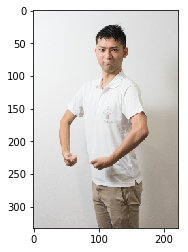

In [126]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください
my_img = cv2.resize(img, (img.shape[1] // 3, img.shape[0] // 3))


cv2.imshow("sample", my_img)


#### ヒント

- `cv2.resize()` を使ってください。

#### 解答例

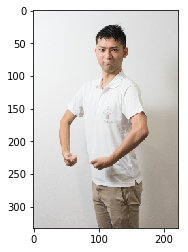

In [24]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください

my_img = cv2.resize(img, (img.shape[1] // 3, img.shape[0] // 3))

cv2.imshow("sample", my_img)


***

### 3.2.4 回転・反転

回転するときは`cv2.warpAffine()`を使います。この関数ではアフィン変換という変換を行っています。その際に必要となる行列は`cv2.getRotationMatrix2D`で入手することができます。<br>
また、反転はcv2.flip(画像, 対象とする軸)を用いることで可能です。
```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# warpAffine()を用いるのに必要な行列をつくります
# 第一引数が回転の中心(今回は画像の中心)です
# 第二引数は回転角度(今回は180度)です
# 第三引数は倍率(今回は2倍に拡大)です

mat = cv2.getRotationMatrix2D(tuple(np.array([img.shape[1], img.shape[0]]) / 2), 180, 2.0)

# アフィン変換をします
# 第一引数が変換したい画像です
# 第二引数が上で生成した行列(mat)です
# 第三引数がサイズです

my_img = cv2.warpAffine(img, mat, img.shape[:2])

cv2.imshow("sample", my_img)
```

#### 問題

- `cv2.flip()`をもちいて画像をx軸中心に反転させてください。 

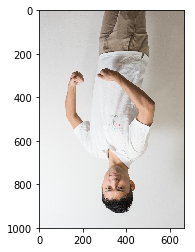

In [35]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください
my_img = cv2.flip(img, 0)

cv2.imshow("sample", my_img)

#### ヒント

- `cv2.flip()`は引数が0のときx軸中心に、正のときy軸中心に、負のとき両方の軸を中心に反転します。

#### 解答例

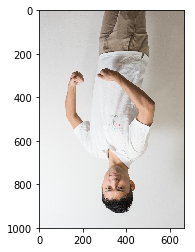

In [142]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください

my_img = cv2.flip(img, 0) # ０X軸で回転。1Y軸で回転。-1; XY両方の軸で回転。

cv2.imshow("sample", my_img)

***

### 3.2.5 色調変換・色反転

画像はRGBで構成されていると説明しました。このRGBを別のものにします。今回はLab色空間というものに変換します。Lab色空間は、人間の視覚に近似するよう設計されている点で優れています。
```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# 色空間の変換

my_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

cv2.imshow("sample", my_img)
```

`cv2.cvtColor` の第二引数をCOLOR_RGB2GRAYにすることで、モノクロ画像に変換することもできます。
***
また、画像の色を反転させることをネガポジ反転といいます。opencvでネガポジ反転を行う際は
```python
img = cv2.bitwise_not(img)
```
とします。`cv2.bitwise` 関数は8bitで表現されている各画素のビットを操作することが出来ます。`not` は各ビットを反転させます。

#### 問題

- sample.jpgの色を反転してください。
- bitwise_notの仕組みを理解するために、for文を用いて自力でbitwise_notと同じ処理を実装してみましょう。

In [ ]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください



cv2.imshow("sample", img)

#### ヒント

- RGBの値は0~255で構成されているので、ある値xを255-xに置き換えることで変換できます。
- OpenCVで読み込まれた画像データは3次元のnumpy配列となっており、
```python
img[i][j][k]=x
```
のようにすると、(i, j)座標の、kが指定するRGBいずれかの値をxに書き換えることができます。  
- for文と、`len(img[i])`のように長さを取得する`len`関数を利用してそれぞれの画素に順番にアクセスし、それぞれの画素値を指定しましょう。

#### 解答例

In [ ]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください

for i in range(len(img)):
    for j in range(len(img[i])):
        for k in range(len(img[i][j])):
            img[i][j][k] = 255 - img[i][j][k]

cv2.imshow("sample", img)

***

## 3.3 openCVの利用

### 3.3.1 閾値処理(二値化)

画像の容量を小さくするために、一定以上明るいもの、あるいは一定以上暗いものを全て同じ値にしてしまうことを閾値（しきいち）処理といいます。`cv2.threshold()`を使うことで実現可能です。
引数を用いることで様々な閾値処理を行うことが出来ます。
```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# 第一引数が処理する画像です
# 第二引数が閾値です
# 第三引数が最大値(maxvalueとする)です
# 第四引数はTHRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TRUNC, THRESH_TOZERO_INVのいずれかとなります。解説は以下の通りです

#THRESH_BINARY　  ：  閾値を超えるピクセルは maxValue に，それ以外のピクセルは 0 になります
#THRESH_BINARY_INV：　閾値を超えるピクセルは 0 に，それ以外のピクセルは maxValue になります
#THRESH_TRUNC　   ：　閾値を超えるピクセルは 閾値 に，それ以外のピクセルは変更されません
#THRESH_TOZERO　  ：　閾値を超えるピクセルは変更されず，それ以外のピクセルは 0 になります
#THRESH_TOZERO_INV：　閾値を超えるピクセルは 0 に，それ以外のピクセルは変更されません

# 今回は閾値を75,最大値を255(今回は使用されない)にして、THRESH_TOZEROを使う
# 閾値も返されるのでretvalで受け取ります

retval, my_img = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO)

cv2.imshow("sample", my_img)
```

#### 問題

- 閾値を100にし、それ以下を0, それ以上を255にしてください。

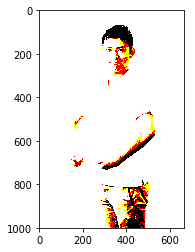

In [27]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください
result, img2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("sample", img2)


#### ヒント

- `THRESH_BINARY` を用います。
- `THRESH_BINARY`を用いると閾値より大きい値はmaxvalueに、そうでないものは0になります。

#### 解答

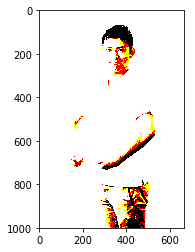

In [28]:
import numpy as np
import cv2
 
img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください

retval, my_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("sample", my_img)

***

### 3.3.2 マスキング

画像の一部分のみをとりだします。白黒で、チャンネル数が1の画像を用意します。これをマスク用の画像と呼ぶことにします。ある画像の、マスク用画像の白い部分と同じ部分だけ抽出することができます。
```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# 第二引数に0を指定すると、チャンネル数が1の画像に変換して読み込みます

mask = cv2.imread("cleansing_data/mask.png", 0)

# 元の画像と同じサイズにします

mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

# 第三引数でマスク用の画像を選びます

my_img = cv2.bitwise_and(img, img, mask = mask)

cv2.imshow("sample", my_img)
```
***
今回使うマスク画像は以下のようなものです。

<img src="https://aidemyexcontentspic.blob.core.windows.net/contents-pic/4050_data_cleansing/cleansing_chap3_20.png" width="100px">

#### 問題

- sample.jpgの、mask.pngの黒い部分だけ取り出すようにしてください 。

667
1000
255
255


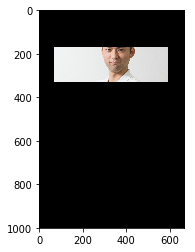

In [117]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
print(img.shape[1])
print(img.shape[0])

mask = cv2.imread("cleansing_data/mask.png", 0)
# maskサイズ(height=329-171=158, width=589 - 71=518)
print(mask[171][71])
print(mask[329][589])

mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

# ここに解答を書いてください
# bitwize_andでマスク画像と元画像の画素ごとの論理積（AND）＝マスク画像で黒い部分は何も見えなくなる
my_img = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("sample", my_img)

#### ヒント

- `cv2.threshold()`で画像を反転してください。
- `bitwise_and` を用いてマスク処理をしてください。

#### 解答例

In [ ]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

mask = cv2.imread("cleansing_data/mask.png", 0)

mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

# ここに解答を書いてください

retval, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)

my_img = cv2.bitwise_and(img, img, mask = mask)

cv2.imshow("sample", my_img)


***

### 3.3.3 ぼかし

画像をぼかすために、あるピクセルの周りのn✕n個のピクセルとの平均を取ります。ぼかしの関数は `GaussianBlur` を用います。
```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# 第一引数は元の画像です
# 第二引数はn✕nのnの値を指定します(nは奇数)
# 第三引数はx軸方向の偏差(通常は0でよい)です

my_img = cv2.GaussianBlur(img, (5, 5), 0)

cv2.imshow("sample", my_img)
```

#### 問題

- 画像にぼかしを施してください。

もと


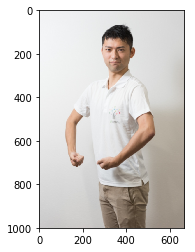

In [36]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください
img =  cv2.GaussianBlur(img, (5,5), 0)

#print("ぼかし")
# cv2.imshow("sample", my_img)
print("もと")
cv2.imshow("hoge", img)


#### ヒント

- `GaussianBlur` を用いましょう。

#### 解答例

In [ ]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください

my_img = cv2.GaussianBlur(img, (21, 21), 0)

cv2.imshow("sample", my_img)


***

### 3.3.4 ノイズの除去

ノイズの除去のためには<br>
`cv2.fastNlMeansDenoisingColored()`を使います。
```python

import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

my_img = cv2.fastNlMeansDenoisingColored(img)

cv2.imshow("sample", my_img)
```

#### 問題

- 今回用いたノイズ処理のための関数の名前を答えてください

- `fastNlMeansNoisingColored`
- `fastNlMeansDenoisingColored`
- `fastNlMeansNoisingDeColored`
- `fastNlMeansDenoisingDeColored`

- ノイズ処理はDenoisingです。

#### 解答

- `fastNlMeansDenoisingColored`

***

### 3.3.5 膨張・収縮

膨張と収縮は主に2値画像で行われます。あるピクセルを中心とし、フィルタ内の最大値をその中心の値にすることを膨張、逆に最小値をその中心の値にすることを収縮といいます。フィルタは、中心のピクセルの上下左右4つを用いる方法と、自身を囲む8つを用いる方法の2通りが主です。<br>
膨張は`cv2.dilate()`<br>
収縮は`cv2.erode()`<br>
を使います
```python
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# フィルタの定義

filt = np.array([[0, ５, 0],
                [5, 0, ５],
                [0, ５, 0]], np.uint8)

# 膨張

my_img = cv2.dilate(img, filt)

cv2.imshow("sample", my_img)
```

np.uint8とはデータの型を表しています。uint8は8ビットで表された符号なしの整数を示します。

#### 問題 

- 説明で用いたものと同じフィルタで収縮してください。

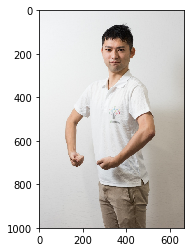

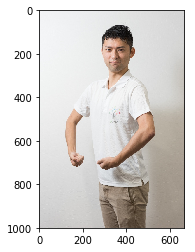

In [28]:
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください
filter_array = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], np.uint8)
my_img = cv2.erode(img, filter_array)


cv2.imshow("sample", my_img)

# 比較のため元の写真を表示します。
cv2.imshow("original", img)

#### ヒント

- 収縮は`cv2.erode()`を用います。

#### 解答例

a
b
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


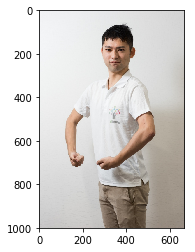

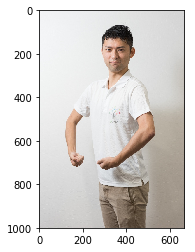

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("cleansing_data/sample.jpg")

# ここに解答を書いてください

filt = np.array([[1, 1, 1],
                [1, 0, 1],
                [1, 1, 1]], np.uint8)

# 収縮
print("a")
my_img = cv2.erode(img, filt)
print("b")
cv2.imshow("sample", my_img)
# 比較のため元の写真を表示します。
cv2.imshow("original", img)

***